In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [2]:
#读取数据，切分 训练集:验证集 = 3:1
data = load_svmlight_file("australian.txt")
X_train, X_test, y_train, y_test = train_test_split(data[0].todense(), data[1], test_size=0.25, random_state=42)

In [3]:
#加一维，全置为1
X_train = np.c_[X_train, np.ones(X_train.shape[0])]
X_test = np.c_[X_test, np.ones(X_test.shape[0])]

In [4]:
rate = 0.0005                     #步长
C = 1                             #hinge loss参数C
iter = 200                        #迭代次数
dimension = X_train.shape[1]      #维度数

In [5]:
#w = np.zeros(dimension)                   #全零初始化
w = np.random.normal(size = (dimension))   #正态分布初始化
G = np.zeros(dimension)                    #梯度G

In [6]:
#主函数
def SVM (X_train, y_train, X_test, y_test, w):
    train_loss = np.zeros(iter)           #初始化 存放训练集loss的向量
    validation_loss = np.zeros(iter)      #初始化 存放验证集loss的向量
    for i in range(iter):        #迭代iter次
        hinge_loss_train = hinge_loss_f(X_train, y_train, w)                                      #调用函数hinge_loss_f计算训练集hinge loss
        train_loss[i] = np.dot(w, w.reshape(dimension, 1)) / 2 + C * hinge_loss_train             #训练集loss = 间隔 + hinge loss
        hinge_loss_validation = hinge_loss_f(X_test, y_test, w)                                   #调用函数hinge_loss_f计算验证集hinge loss
        validation_loss[i] = np.dot(w, w.reshape(dimension, 1)) / 2 + C * hinge_loss_validation   #验证集loss = 间隔 + hinge loss
        #gradient descent
        G = derivative(X_train, y_train, w)          #调用函数derivative 计算梯度G
        w = w - rate * G                             #梯度下降 更新w
    return train_loss,validation_loss       #返回训练集loss和验证集loss

In [7]:
#计算hinge loss
def hinge_loss_f (X, y, w):
    loss = 0
    for i in range(X.shape[0]):
        judge = y[i] * np.dot(X[i], w.reshape(dimension, 1))    #分段函数 判断y * X * W与1的大小
        if (judge >= 1):
            loss = loss + 0                                     #大于1 hinge loss = 0
        else:
            loss = loss + 1 - judge                             #小于1 加上 1 - y * X * W
    loss = loss / X.shape[0]                #loss取平均
    return loss                             #返回hinge loss

In [8]:
#求梯度G
def derivative (X, y, w):
    g = np.zeros(X.shape[1])   #存放 hinge loss 的梯度
    for i in range(X.shape[0]):   #对每一条记录迭代一次
        judge = y[i] * np.dot(X[i], w.reshape(dimension, 1))   #分段函数 判断
        if (judge < 1):               #小于1 则更新g 否则 g = g + 0
            g = g - y[i] * X[i]
    G = w + C * g              #计算梯度G
    return G

In [9]:
#调用函数SVM
L_train, L_validation = SVM(X_train, y_train, X_test, y_test, w)

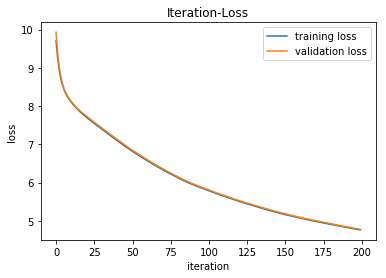

In [11]:
#loss图像
x = np.arange(iter)

plt.plot(x, L_train.tolist(), label='training loss')
plt.plot(x, L_validation.tolist(), label='validation loss')

plt.xlabel('iteration')
plt.ylabel('loss')

plt.title('Iteration-Loss')

plt.legend()

plt.show()